Fernando Nieto Rios 1930885                                                        
David Fernando Sustaita Zuñiga 1923518                                                                                                   
Alejandro Guadalupe Flores Mendoza 1665530


In [128]:
import cv2
import glob
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [129]:
mnist = keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [130]:
clas_names = ["0", "1", "2", "3", "4",
              "5", "6", "7", "8", "9"]


In [131]:
x_train = x_train / 255.
x_test = x_test / 255.

In [132]:
x_train.shape


(60000, 28, 28)

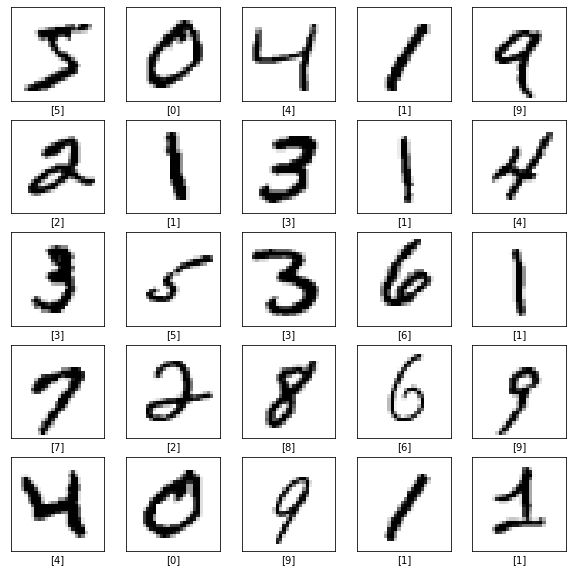

In [133]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel([y_train[i]])
plt.show()

In [134]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])


In [135]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [136]:
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2598 - accuracy: 0.9261 - val_loss: 0.1380 - val_accuracy: 0.9589
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1157 - accuracy: 0.9652 - val_loss: 0.1015 - val_accuracy: 0.9696
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0791 - accuracy: 0.9763 - val_loss: 0.0831 - val_accuracy: 0.9737
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0595 - accuracy: 0.9815 - val_loss: 0.0755 - val_accuracy: 0.9757
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0458 - accuracy: 0.9860 - val_loss: 0.0738 - val_accuracy: 0.9760
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0351 - accuracy: 0.9890 - val_loss: 0.0759 - val_accuracy: 0.9756
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0283 - accuracy: 0.9917 - val_loss: 0.0750 - val_accuracy:

313/313 - 0s - loss: 0.0782 - accuracy: 0.9779 - 481ms/epoch - 2ms/step


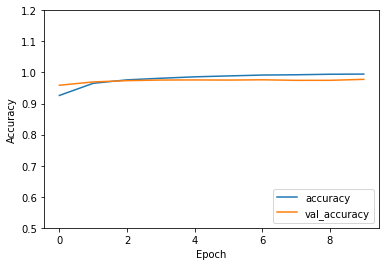

In [137]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1.2])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)

In [138]:
test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.0782 - accuracy: 0.9779 - 497ms/epoch - 2ms/step

Test accuracy: 0.9779000282287598


In [139]:
imagenes_full=[]
etiquetas_full =[]
num = 0

In [140]:
for m in "Mecatronic":
  path = glob.glob("/content/Ingenieria/" + str(num) + "/*.jpg")
  for n in path:
    test_image = cv2.imread(n, cv2.IMREAD_GRAYSCALE)
  
    # Formato de imagen
    img_resized = cv2.resize(test_image, (28, 28), interpolation=cv2.INTER_LINEAR)
    img_resized = cv2.bitwise_not(img_resized)

    #Guardar imagenes
    imagenes_full.append(img_resized)
    etiquetas_full.append(num)
  num +=1

In [141]:
len(imagenes_full)

290

In [142]:
len(etiquetas_full)

290

In [143]:

y = np.array(etiquetas_full)
X = np.array(imagenes_full, dtype=np.uint8)

In [144]:
train_X,test_X,train_Y,test_Y = train_test_split(X,y,test_size=0.9)

In [145]:
test_X.shape

(261, 28, 28)

In [146]:
predictions = model.predict(test_X)

9/9 [==============================] - 0s 2ms/step


# ***`PRIMERA PREDICCION`***

In [147]:
predictions[0]

array([0.        , 0.        , 0.        , 0.99999994, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ],
      dtype=float32)

In [148]:
np.argmax(predictions[0])

3

In [149]:
test_Y[0]

5

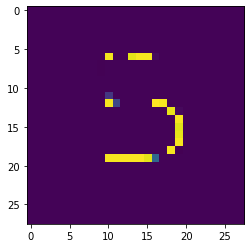

In [151]:
plt.imshow(test_X[0])

# ***`SEGUNDA PREDICCION`***

In [152]:
predictions[-1]

array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [153]:
np.argmax(predictions[-1])

2

In [154]:
test_Y[-1]

5

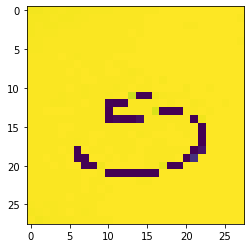

In [155]:
plt.imshow(test_X[-1])

# ***`TERCERA PREDICCION`***

In [156]:
predictions[5]

array([0.        , 0.        , 0.99999994, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ],
      dtype=float32)

In [157]:
np.argmax(predictions[5])

2

In [158]:
test_Y[5]

7

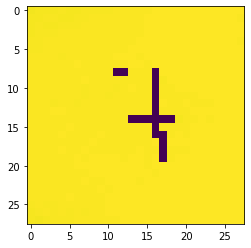

In [159]:
plt.imshow(test_X[5])